<a href="https://colab.research.google.com/github/GregSym/SunsetProblem/blob/spoon/SunsetProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Dear Hank and John: 'The Sunset Problem' </h1>

<p>
  On ep: 305 - 'The Manhole Problem' of the podcast 'Dear Hank and John' (a comedy podcast / ostensible advice show) one of the questions was, roughly, 
  'how fast do you have to go for it to always be sunset?'
  (https://podcasts.google.com/feed/aHR0cDovL2ZlZWRzLndueWMub3JnL2RlYXJoYW5rYW5kam9obg?sa=X&ved=0CDQQ9sEGahcKEwjQqYOUlKDzAhUAAAAAHQAAAAAQAQ)
</p>

<p>
  The provided answer was a combination of simply going to the North Pole or travelling around the equator at 1000mph (~1500kmph - the podcast is American).
I would argue that this is inefficient, probably in both cases.
</p>

<ul>
<li>
  During the famous 'Midnight Sun', the North Pole actually experiences a sun that is at too high an angle to qualify for a sunset. I understand this seems pedantic. That would be because you have accurately guessed this is going to be an unhelpfully pedantic process.
</li>
<li>
  I don't feel like I need to explain why the equator is a bad choice for the 'just go fast in a circle' strategy, because it is the largest possible circle of many perfectly allowable circles. You can travel far enough away from the equator that sunsets become harder to account for reliably, but this isn't a problem if you choose a circle that runs instead through, say, Cairo.
</li>
</ul>


definition of a sunset: https://what-if.xkcd.com/42/
<p>
  NOTE: This draws attention to the fact that in order for a sunset to be a sunset a sun does in fact have to set at some point, and indeed be dancing precariously over the horizon in preperation of doing this. The question asker specifically sought to drag out the sunset for as long as possible, ergo, the best possible outcome will be assumed to be that seconds before one's ultimate demise, which ever mode of transport in use is halted and the setting is observed. Any strategy that does not involve observing the actual setting of the sun will be considered invalid.
'Unsetting' the sun, by means of excessive speed, will also be considered invalid. We are aiming for efficiency, afterall. One must remain within the boundaries of the sunset at all times.
</p>

# Section 1: Trying to logic our way out of doing geography

Before we start plotting concentric circles on map packages, we do have enough information to get maximum approximate sunset length as a function of date and longitude - this lets us cheat a little bit. Assuming the length of the sunset is your window of time in which to reach another point where a sunset is starting, the approximate speed of travel required at that longitude can be estimated. Going up to the limit of where sunsets are nice and well-behaved, we can do the easiest possible maths - this ought to give us a nice yardstick to compare against for performance, but nowhere near a pedantic enough result.

In [1]:
from datetime import datetime, timedelta

In [2]:
longest_possible_sunset = timedelta(minutes=40)

In [3]:
import ephem

A quick note about how ephem.Angle class types behave from the pyephem guys:

"Instead of making angular units explicit in your code, PyEphem tried to be clever but only wound up being obscure. An input string '1.23' is parsed as degrees of declination (or hours, when setting right ascension) but a float 1.23 is assumed to be in radians. Angles returned by PyEphem are even more confusing: print them, and they display degrees; but do math with them, and you will find they are radians. This causes substantial confusion and makes code much more difficult to read, but can never be fixed without breaking programs that already use PyEphem."

TL;DR: you can set using strings that read like latitude/longitude notation, get when you get the value back, it's sometimes in degrees and sometimes in radians - this is dumb, but it turns out to work really well for specifically the things we're about to use it for, so I'm not going to complain too loudly. It does make some things a little confusing to follow

In [4]:
sun = ephem.Sun()

position_on_earth = ephem.Observer()
position_on_earth.lat = '0'
position_on_earth.lon = '0'
position_on_earth.date = '2007/10/02 00:50:22'
sun.compute(position_on_earth)
print(position_on_earth.next_rising(sun))
print(position_on_earth.next_setting(sun))


2007/10/2 05:45:59
2007/10/2 17:52:54


In [ ]:
# testing package behaviour
help(position_on_earth.next_setting(sun))

In [6]:
position_on_earth.next_setting(sun).datetime().day

2

In [7]:
def has_sunset_on_date(position: ephem.Observer, date: datetime) -> bool:
  position.date = date
  sun.compute(position)
  try:
    # print(position.next_setting(sun))
    position.next_setting(sun)
    return True
  except ephem.CircumpolarError: # error type if date has no sunset at given position
    return False

In [8]:
  target_date = datetime(year=2021, month=9, day=27, hour=0, minute=0, second=0)
  position = ephem.Observer()
  position.lat = '0'
  position.lon = '0'
  has_sunset_on_date(position=position, date=target_date)

True

In [9]:
position = ephem.Observer()
target_date = datetime(year=2021, month=12, day=28, hour=0, minute=0, second=0)

def northernmost_sunset_for_date(position: ephem.Observer, date: datetime):
  position.lat = '0'
  while True:

    if not has_sunset_on_date(position=position, date=date):
      break
    position.lat += .001 # move north
  print(position)
northernmost_sunset_for_date(position=position, date=target_date)

<ephem.Observer date='2021/12/28 00:00:00' epoch='2000/1/1 12:00:00' lon='0:00:00.0' lat='67:39:58.7' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>


In [10]:
import numpy as np

def velocity_from_latitude(latitude: ephem.Angle) -> float:
  return np.cos(latitude) * 1_669.8 #kph

In [11]:
print(velocity_from_latitude(latitude=position.lat))
position.lat = '0'
velocity_from_latitude(latitude=position.lat)

634.5240468315385


1669.8

Generate a calendar off of which to work

ref: https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python

In [12]:
import pandas as pd

jan_1 = datetime(year=2022, month=1, day=1, hour=0, minute=0, second=0)
year_2022 = pd.date_range(jan_1, periods=365).to_pydatetime().tolist()
print(year_2022)

[datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 1, 2, 0, 0), datetime.datetime(2022, 1, 3, 0, 0), datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 5, 0, 0), datetime.datetime(2022, 1, 6, 0, 0), datetime.datetime(2022, 1, 7, 0, 0), datetime.datetime(2022, 1, 8, 0, 0), datetime.datetime(2022, 1, 9, 0, 0), datetime.datetime(2022, 1, 10, 0, 0), datetime.datetime(2022, 1, 11, 0, 0), datetime.datetime(2022, 1, 12, 0, 0), datetime.datetime(2022, 1, 13, 0, 0), datetime.datetime(2022, 1, 14, 0, 0), datetime.datetime(2022, 1, 15, 0, 0), datetime.datetime(2022, 1, 16, 0, 0), datetime.datetime(2022, 1, 17, 0, 0), datetime.datetime(2022, 1, 18, 0, 0), datetime.datetime(2022, 1, 19, 0, 0), datetime.datetime(2022, 1, 20, 0, 0), datetime.datetime(2022, 1, 21, 0, 0), datetime.datetime(2022, 1, 22, 0, 0), datetime.datetime(2022, 1, 23, 0, 0), datetime.datetime(2022, 1, 24, 0, 0), datetime.datetime(2022, 1, 25, 0, 0), datetime.datetime(2022, 1, 26, 0, 0), datetime.datetime(20

In [13]:
northernmost_sunset_latitude = []
for date in year_2022:
  northernmost_sunset_for_date(position=position, date=date)
  northernmost_sunset_latitude.append(position.lat)
print(northernmost_sunset_latitude)


<ephem.Observer date='2022/1/1 00:00:00' epoch='2000/1/1 12:00:00' lon='0:00:00.0' lat='67:57:10.1' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>
<ephem.Observer date='2022/1/2 00:00:00' epoch='2000/1/1 12:00:00' lon='0:00:00.0' lat='68:00:36.3' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>
<ephem.Observer date='2022/1/3 00:00:00' epoch='2000/1/1 12:00:00' lon='0:00:00.0' lat='68:07:28.9' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>
<ephem.Observer date='2022/1/4 00:00:00' epoch='2000/1/1 12:00:00' lon='0:00:00.0' lat='68:14:21.4' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>
<ephem.Observer date='2022/1/5 00:00:00' epoch='2000/1/1 12:00:00' lon='0:00:00.0' lat='68:21:13.9' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>
<ephem.Observer date='2022/1/6 00:00:00' epoch='2000/1/1 12:00:00' lon='0:00:00.0' lat='68:28:06.4' elevation=0.0m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>
<ephem.Obs

In [14]:
import matplotlib.pyplot as plt

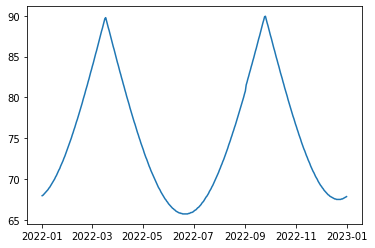

In [21]:
plt.plot(year_2022, [lat * 180 / np.pi for lat in northernmost_sunset_latitude]) # degrees are a little easier unless you put it in terms of pi by factoring it out anyway
plt.show()

Therefore, the naive solution here, is to simply find the speed of rotation of the earth's surface about its axis at the latitude co-ordinate of the northernmost sunset for a given day.

I should probably address the hemisphere selection here: I am personally from the Southern Hemisphere, and like to think I harbour no internalised bias against the South of the planet; however, the Earth experiences slightly longer sunsets in the North, which affords one a higher margin of error, something I assume is likely helpful. Of course, there is less air travel over the Antarctic, which may have benefits for flight plans which I am failing to take into account. In any event, the math below is assuming a perfect sphere and 0 elevation, so there probably isn't going to be significant hemispheric variation in the result.

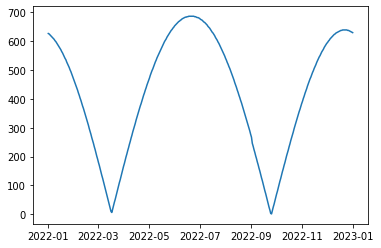

In [16]:
plt.plot(year_2022, [velocity_from_latitude(lat) for lat in northernmost_sunset_latitude])
plt.show()